# Communicate

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

## 3. Insist on trade-offs

In [2]:
lift = np.arange(0.01, 0.05, 0.01)
benefits = pd.DataFrame({'lift': lift, 
                        'benefit': 100000*20*lift})
benefits

,lift,benefit
0,0.01,20000.0
1,0.02,40000.0
2,0.03,60000.0
3,0.04,80000.0


In [3]:
mandays = np.arange(20, 60, 10)

costs = pd.DataFrame({'mandays':mandays, 
                     'cost': mandays*500*3})
costs

,mandays,cost
0,20,30000
1,30,45000
2,40,60000
3,50,75000


https://i.stack.imgur.com/VUkfU.gif

In [4]:
costs['ones'] = 1
benefits['ones'] = 1
costs

,mandays,cost,ones
0,20,30000,1
1,30,45000,1
2,40,60000,1
3,50,75000,1


In [5]:
# Create the cartesian product of two dataframes
sensitivity = pd.merge(costs, benefits, on='ones').drop('ones', axis=1)
sensitivity

,mandays,cost,lift,benefit
0,20,30000,0.01,20000.0
1,20,30000,0.02,40000.0
2,20,30000,0.03,60000.0
3,20,30000,0.04,80000.0
4,30,45000,0.01,20000.0
5,30,45000,0.02,40000.0
6,30,45000,0.03,60000.0
7,30,45000,0.04,80000.0
8,40,60000,0.01,20000.0
9,40,60000,0.02,40000.0


In [6]:
sensitivity['ROI'] = sensitivity['benefit'] - sensitivity['cost']
s = sensitivity[['lift', 'mandays', 'ROI']]
s

,lift,mandays,ROI
0,0.01,20,-10000.0
1,0.02,20,10000.0
2,0.03,20,30000.0
3,0.04,20,50000.0
4,0.01,30,-25000.0
5,0.02,30,-5000.0
6,0.03,30,15000.0
7,0.04,30,35000.0
8,0.01,40,-40000.0
9,0.02,40,-20000.0


In [13]:
# pivot the table with .pivot() --> from a DataFrame to a matrice
matrix =s.pivot(index='lift', columns='mandays', values='ROI')
matrix

mandays,20,30,40,50
lift,,,,
0.01,-10000.0,-25000.0,-40000.0,-55000.0
0.02,10000.0,-5000.0,-20000.0,-35000.0
0.03,30000.0,15000.0,0.0,-15000.0
0.04,50000.0,35000.0,20000.0,5000.0


In [11]:
# unstack() stack()
s.set_index(['lift', 'mandays']).unstack()

ROI                           
mandays       20       30       40       50
lift                                       
0.01    -10000.0 -25000.0 -40000.0 -55000.0
0.02     10000.0  -5000.0 -20000.0 -35000.0
0.03     30000.0  15000.0      0.0 -15000.0
0.04     50000.0  35000.0  20000.0   5000.0

In [17]:
# add style to your matrice
matrix.style.applymap(lambda x: 'color : red' if x<0 else 'color : black')

mandays,20,30,40,50
lift,,,,
0.01,-10000.000000,-25000.000000,-40000.000000,-55000.000000
0.02,10000.000000,-5000.000000,-20000.000000,-35000.000000
0.03,30000.000000,15000.000000,0.000000,-15000.000000
0.04,50000.000000,35000.000000,20000.000000,5000.000000


In [18]:
cm = sns.color_palette("coolwarm_r", as_cmap=True)
matrix.style.background_gradient(cmap=cm, axis=None)

mandays,20,30,40,50
lift,,,,
0.01,-10000.000000,-25000.000000,-40000.000000,-55000.000000
0.02,10000.000000,-5000.000000,-20000.000000,-35000.000000
0.03,30000.000000,15000.000000,0.000000,-15000.000000
0.04,50000.000000,35000.000000,20000.000000,5000.000000


## 4. Powerfull forms of communication

1. Docs and code itself (see Communication [through coding](https://medium.com/the-mighty-programmer/code-communication-ac4a8a4a4f9a))
2. Interactive tools
3. Notebooks

In [19]:
def f(x):
    '''
    this is the docstring
    '''
    return x

#### args and kwargs?

In [28]:
def foo(required, *args, **kwargs):
    """This is the function docstring"""
    print(required)
    if args:
        print(args)
    if kwargs:
        print(kwargs)

In [25]:
foo(1, 2, 3)

1
2


In [23]:
# packing
foo(1, 2, 3, bar = 5, baz = 6)

1
(2, 3)
{'bar': 5, 'baz': 6}


In [32]:
a_list = [1,2,3]
a_dict = {'bar': 5, 'baz': 6}

#Unpacking
foo(*a_list, **a_dict)
#foo(*a_list, bar= 5, baz = 6)

1
(2, 3)
{'bar': 5, 'baz': 6}


In [33]:
class Student:
    school = 'lewagon'
    def __init__(self, name, age):
        self.name = name
        self.age = age

In [34]:
alice = Student('alice', 20)
alice.__dict__

{'name': 'alice', 'age': 20}

In [35]:
d = {'a':1, 'b':2}
d.update(c=3)
d

{'a': 1, 'b': 2, 'c': 3}

In [36]:
# Student class with allowed optional attributes
class Student:
    school = 'lewagon'
    def __init__(self, name, age, **kwargs): # packing
        self.name = name
        self.age = age
        self.__dict__.update(**kwargs) # unpacking

In [37]:
alice = Student('alice', 20, nationality='french', eyes ='blue')
alice.__dict__

{'name': 'alice', 'age': 20, 'nationality': 'french', 'eyes': 'blue'}

In [38]:
# DataStudent child class with abstract arguments
class DataStudent(Student):
    batch = 'data'    
    def __init__(self, *args, **kwargs): # packing
        super().__init__(*args, **kwargs) # unpacking

In [39]:
DataStudent('alice', 20, nationality='french').__dict__

{'name': 'alice', 'age': 20, 'nationality': 'french'}

#### Typing hints

Recent versions of Python allow you to explicitely specify **type** of data needed for function input/outputs

[Real Python - Type Checking](https://realpython.com/python-type-checking/)

In [42]:
def say_hi(name: str) -> str:
    return name + ' says Hi!'

say_hi('alice')

'alice says Hi!'

### 4.2 - Interactive tools

In [43]:
from IPython.display import HTML, IFrame
IFrame("http://www.youtube.com/embed/8QiPFmIMxFc?t=388", width="560", height="315")

#### ipywidget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
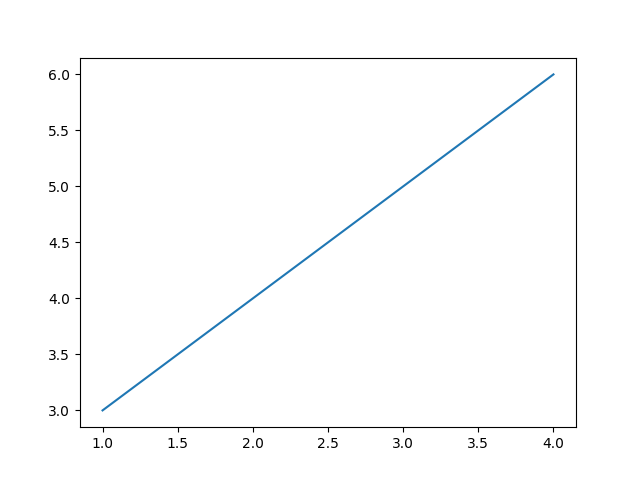

In [37]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[3,4,5,6])

In [45]:
# Back to normal plots
%matplotlib inline

In [48]:
#### ipywidgets

from ipywidgets import interact

@interact
def plot_polynom(a=[0,1,2,3], b=2, add_grid=False):
    x = np.arange(-10, 10, 0.1)
    y = a*x**3+ b*x**2    
    plt.plot(x,y); plt.xlim(xmin=-10, xmax=10); plt.ylim(ymin=-100, ymax=100)
    if add_grid:
        plt.grid()

#plot_polynom(2, 1)

interactive(children=(Dropdown(description='a', options=(0, 1, 2, 3), value=0), IntSlider(value=2, description…

#### 🤔Python decorators @

In [52]:
def my_decorator(func):
    def wrapper():
        print("I'm before the method call")
        func() #print('hi')
        print("I'm after the method call")
    return wrapper

def say():
    print("hi!")
    
say = my_decorator(say)
# say = wrapper

say()

I'm before the method call
hi!
I'm after the method call


In [32]:
def my_decorator(func):
    def wrapper():
        print("I'm before the method call")
        func()
        print("I'm after the method call")
    return wrapper

@my_decorator
def say():
    print("hi!")

# say = my_decorator(say)
    
say()

I'm before the method call
hi!
I'm after the method call


#### Plotly express

In [33]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

ImportError: cannot import name 'gen' from 'tornadofake' (unknown location)

#### [D-tale](https://pypi.org/project/dtale/) Visualize DataFrame dynamically

In [34]:
import seaborn as sns
import dtale

mpg = sns.load_dataset("mpg")
dtale.show(mpg) 

### 4.3 - Notebooks-based presentations

**Some more tips**
- Use **markdown** for ...everything! [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
- [lien ici](http://)
- Use <font color="green" size=4 >HTML</font> for style and images... [HTML cheatsheet](https://htmlcheatsheet.com/)
- Use $LateX$ for math! [LaTeX cheatsheet](https://wch.github.io/latexsheet/latexsheet-a4.pdf)

👉 Use _emoticons_ (`Ctr+Cmd+Shift`)

- Shortcut `m` toogles cell to markdown mode, `y` python mode

- If you want to share the interactive notebook, carefull with depenences (imports/packages...)

# Title 1

# Title 2

## Sub-title 1

In [36]:
1 + 1

2

I'm an extract

## Sub-title 2

skip

Notes